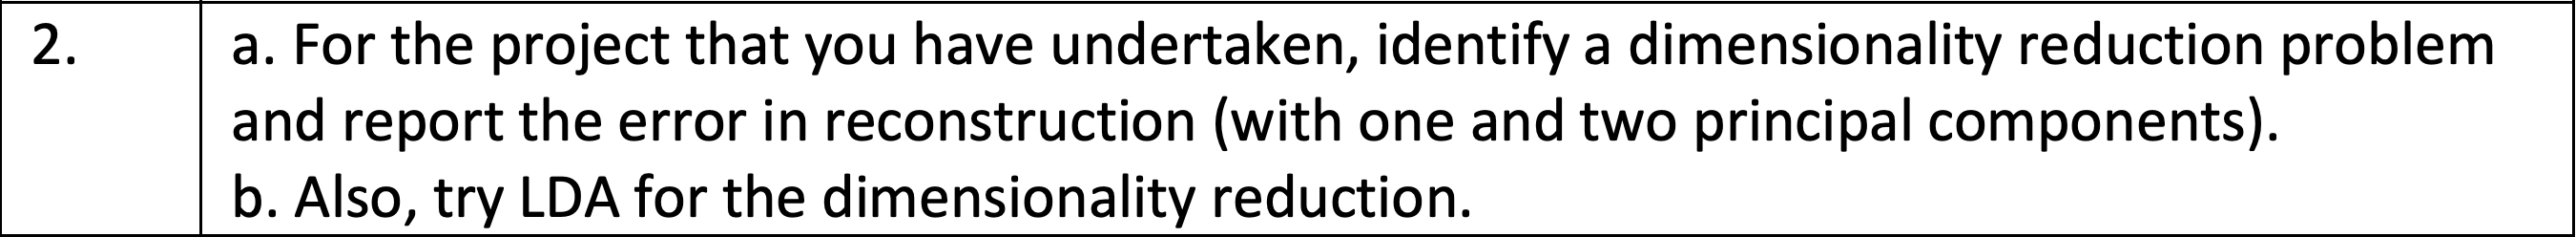

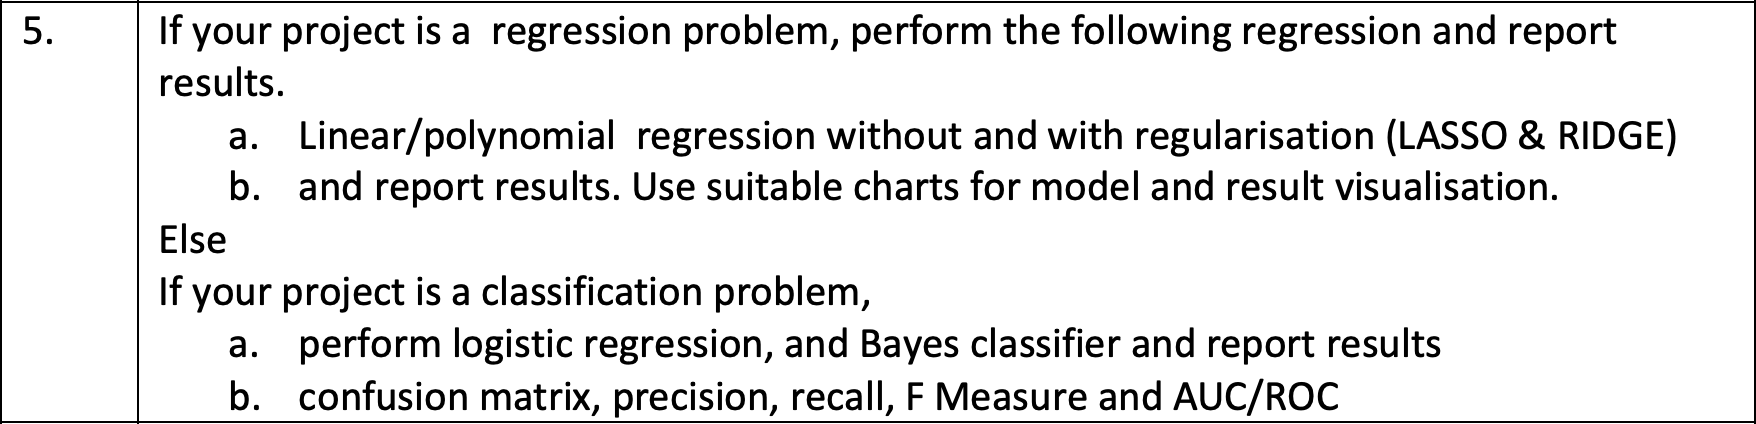

Linear Regression RMSE: 10.249140980486098


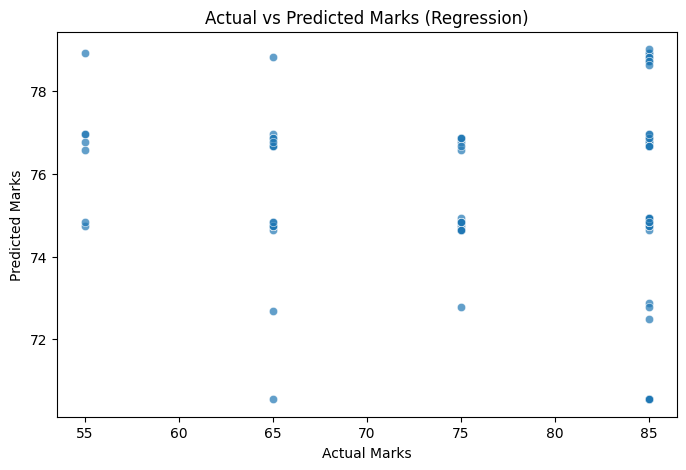

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.97      0.83        65
           1       0.71      0.17      0.28        29

    accuracy                           0.72        94
   macro avg       0.72      0.57      0.55        94
weighted avg       0.72      0.72      0.66        94

Confusion Matrix:
 [[63  2]
 [24  5]]
ROC AUC Score: 0.6920424403183024


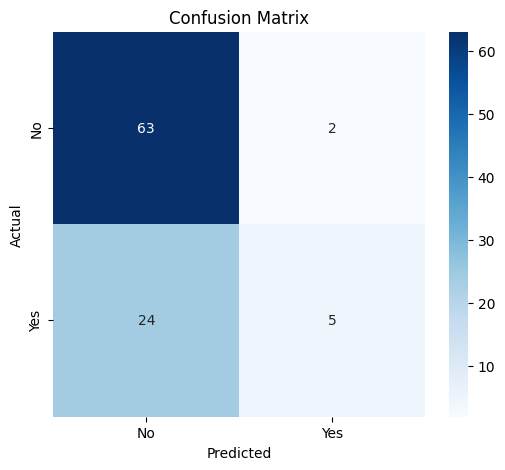

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, roc_auc_score

# Load data
file_path = "/Users/kishore/Downloads/Student Performance Survey (Responses).xlsx"
df = pd.read_excel(file_path, sheet_name="Form Responses 1")

# Drop timestamp column
df = df.iloc[:, 1:]

# Select only the required columns
columns_needed = [
    "Average marks in the last semester?",
    "How consistent are your marks?",
    "How many hours do you study per week?",
    "Have you failed any subjects before?"
]
df = df[columns_needed]

# Handle missing values (drop rows with missing target values)
df = df.dropna(subset=["Average marks in the last semester?", "Have you failed any subjects before?"])

# Encode categorical target variables
marks_mapping = {"Below 50": 45, "50-60": 55, "60-70": 65, "70-80": 75, "80 and above": 85}
df["Average marks in the last semester?"] = df["Average marks in the last semester?"].map(marks_mapping)
df["Have you failed any subjects before?"] = df["Have you failed any subjects before?"].map({"Yes": 1, "No": 0})

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=["object"]):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Handle missing values in features
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:, :-2] = imputer.fit_transform(df.iloc[:, :-2])

# Define features and targets
X = df.drop(columns=["Average marks in the last semester?", "Have you failed any subjects before?"])
y_reg = df["Average marks in the last semester?"]
y_clf = df["Have you failed any subjects before?"]

# Split data
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg, y_clf, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regression Models
lin_reg = LinearRegression().fit(X_train, y_reg_train)
ridge = Ridge(alpha=1.0).fit(X_train, y_reg_train)
lasso = Lasso(alpha=0.1).fit(X_train, y_reg_train)

# Classification Model
log_reg = LogisticRegression().fit(X_train, y_clf_train)

# Predictions
y_reg_pred = lin_reg.predict(X_test)
y_clf_pred = log_reg.predict(X_test)
y_clf_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate Regression
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_reg_test, y_reg_pred)))

# Plot Regression Predictions
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_reg_test, y=y_reg_pred, alpha=0.7)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks (Regression)")
plt.show()

# Evaluate Classification
print("Classification Report:\n", classification_report(y_clf_test, y_clf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_clf_test, y_clf_pred))
print("ROC AUC Score:", roc_auc_score(y_clf_test, y_clf_proba))

# Confusion Matrix Plot
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_clf_test, y_clf_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


We analyzed student performance using regression (predicting marks) and classification (predicting failures).<br>
Steps:
1. Data Preprocessing
    * Loaded survey data, removed timestamps, and selected relevant columns.
    * Handled missing values and encoded categorical variables.
    * Scaled numerical features.
2. Model Training
    * Regression: Linear, Ridge, and Lasso models to predict marks.
    * Classification: Logistic Regression to predict failures.
3. Evaluation
    * Regression: RMSE calculated (shows prediction error).
    * Classification: Confusion matrix, classification report, and AUC score.
4. Visualization
    * Scatter plot for regression results.
    * Confusion matrix for classification performance.
